# Association rule mining

In [42]:
from pandas import DataFrame, Series
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

In [43]:
import pandas as pd

with open('/Users/xinyiliu/Downloads/groceries.txt', 'r') as file:
    groceries = [line.strip().split(',') for line in file]

# Remove duplicates
groceries_cleaned = [list(tup) for tup in set(tuple(items) for items in groceries)]

In [44]:
te = TransactionEncoder()
te_ary = te.fit(groceries_cleaned).transform(groceries_cleaned)
df_groceries = pd.DataFrame(te_ary, columns=te.columns_)
len(df_groceries)

7011

In [45]:
#frequent_itemsets = fpgrowth(df_groceries, min_support=0.1, use_colnames=True)
### alternatively:
frequent_itemsets = apriori(df_groceries, min_support=0.01, use_colnames=True)
#frequent_itemsets = fpmax(df_groceries, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.010697,(Instant food products)
1,0.044644,(UHT-milk)
2,0.024533,(baking powder)
3,0.068606,(beef)
4,0.044216,(berries)
...,...,...
554,0.011125,"(tropical fruit, whipped/sour cream, whole milk)"
555,0.021110,"(whole milk, tropical fruit, yogurt)"
556,0.015262,"(yogurt, whipped/sour cream, whole milk)"
557,0.010983,"(root vegetables, whole milk, other vegetables..."


In [46]:
# Set confidence threshold
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(baking powder),(whole milk),0.024533,0.316931,0.012980,0.529070,1.669356,0.005204,1.450468,0.411051
1,(butter),(whole milk),0.075738,0.316931,0.038368,0.506591,1.598430,0.014365,1.384389,0.405065
2,(curd),(whole milk),0.072315,0.316931,0.036514,0.504931,1.593191,0.013595,1.379746,0.401353
3,"(butter, other vegetables)",(whole milk),0.028099,0.316931,0.016118,0.573604,1.809873,0.007212,1.601961,0.460412
4,"(root vegetables, butter)",(whole milk),0.018114,0.316931,0.011553,0.637795,2.012413,0.005812,1.885866,0.512365
5,"(butter, yogurt)",(whole milk),0.020539,0.316931,0.013122,0.638889,2.015864,0.006613,1.891577,0.514502
6,"(root vegetables, citrus fruit)",(other vegetables),0.024818,0.251890,0.014549,0.586207,2.327235,0.008297,1.807933,0.584820
7,"(root vegetables, citrus fruit)",(whole milk),0.024818,0.316931,0.012837,0.517241,1.632034,0.004971,1.414930,0.397123
8,"(other vegetables, curd)",(whole milk),0.023962,0.316931,0.013693,0.571429,1.803009,0.006098,1.593829,0.456306
9,"(curd, yogurt)",(whole milk),0.023534,0.316931,0.014121,0.600000,1.893159,0.006662,1.707674,0.483153


In [47]:
# Set lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pork),(beef),0.075310,0.068606,0.010412,0.138258,2.015226,0.005245,1.080826,0.544807
1,(beef),(pork),0.068606,0.075310,0.010412,0.151767,2.015226,0.005245,1.090137,0.540886
2,(root vegetables),(beef),0.146627,0.068606,0.023820,0.162451,2.367872,0.013760,1.112047,0.676937
3,(beef),(root vegetables),0.068606,0.146627,0.023820,0.347193,2.367872,0.013760,1.307237,0.620232
4,(berries),(whipped/sour cream),0.044216,0.094138,0.012124,0.274194,2.912683,0.007961,1.248077,0.687053
...,...,...,...,...,...,...,...,...,...,...
139,"(other vegetables, yogurt)","(tropical fruit, whole milk)",0.059763,0.058052,0.010697,0.178998,3.083421,0.007228,1.147315,0.718633
140,"(tropical fruit, yogurt)","(other vegetables, whole milk)",0.040793,0.103552,0.010697,0.262238,2.532437,0.006473,1.215091,0.630858
141,(other vegetables),"(tropical fruit, yogurt, whole milk)",0.251890,0.021110,0.010697,0.042469,2.011819,0.005380,1.022307,0.672277
142,(tropical fruit),"(other vegetables, yogurt, whole milk)",0.139352,0.031094,0.010697,0.076766,2.468824,0.006364,1.049469,0.691281


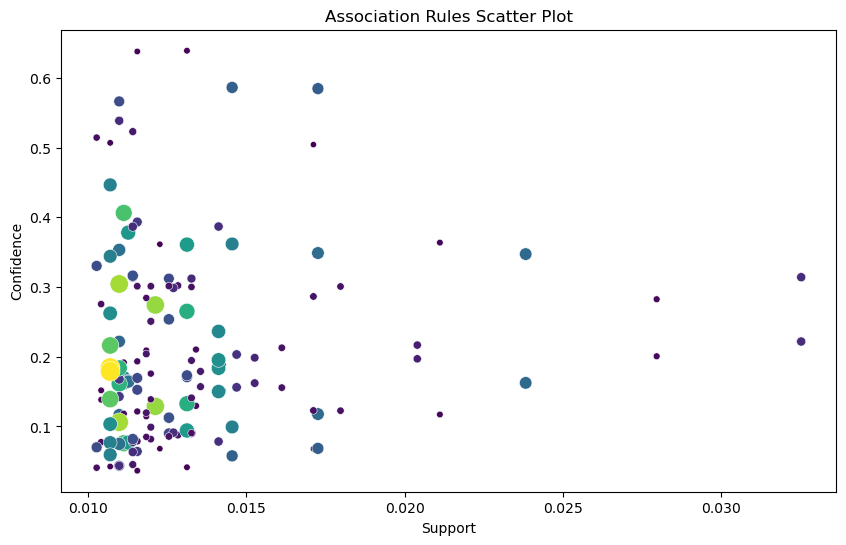

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200), legend=None)
plt.title('Association Rules Scatter Plot')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In the analysis, we used a support threshold of 0.01, meaning that the itemsets must appear in at least 1% of the transactions to be considered frequent. This allows for the inclusion of more frequent itemsets, which provides a broader range of associations for analysis. A confidence threshold of 0.5 was chosen to capture associations where there is at least a 50% chance that when the items on the left-hand side of the rule are purchased, the items on the right-hand side are also purchased. This allows for moderate confidence in the rule associations. The lift threshold was set at 2, ensuring that the itemsets we examine have a lift value that indicates the association is at least twice as strong as expected by chance.

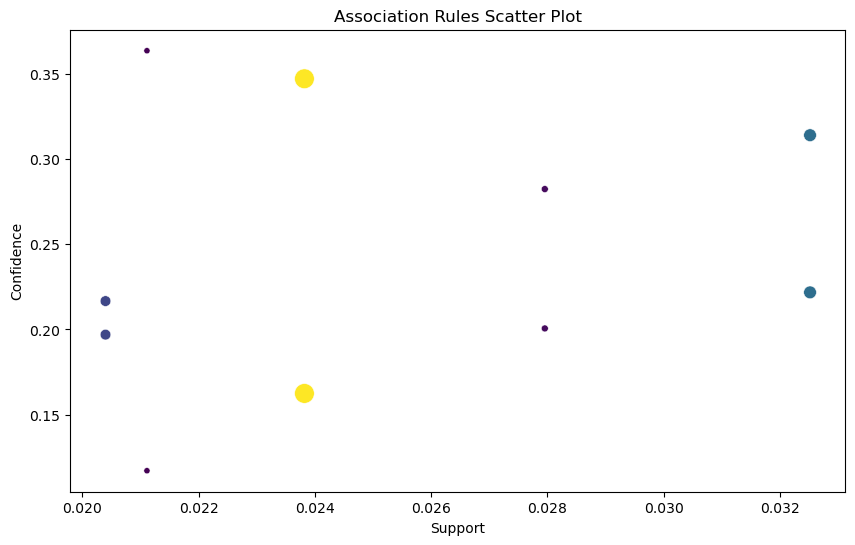

In [31]:
# Another try
frequent_itemsets = apriori(df_groceries, min_support=0.02, use_colnames=True)
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200), legend=None)
plt.title('Association Rules Scatter Plot')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In this analysis, we set the thresholds for support, confidence, and lift to focus on the most relevant and impactful association rules. The minimum support threshold of 0.02 was chosen to ensure that the frequent itemsets we are analyzing appear in at least 2% of all transactions, allowing us to capture common purchasing patterns while filtering out rare and potentially insignificant combinations. A confidence threshold of 0.8 was selected to highlight rules that hold true in at least 80% of cases when the antecedent items are purchased, ensuring that the identified associations are reliable. Lastly, a lift threshold of 2 was used to identify rules where the co-occurrence of items is at least twice as likely as random chance, indicating strong associations between items.

Some interesting findings emerged from this analysis. The association rules with high confidence and lift often involve items that are commonly purchased together, suggesting strong and actionable relationships between certain products. For example, high-lift rules indicate that when customers buy certain items, they are significantly more likely to purchase related products, potentially pointing towards complementary goods or habitual buying patterns. These insights could be leveraged by retailers to design effective cross-promotions, optimize product placement, and improve inventory management.